<a href="https://colab.research.google.com/github/joaquinvvelaco/diplo-datos-2022/blob/main/eyc/entregables/Grupo_29_Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas 

import seaborn
seaborn.set_context('talk')

In [2]:
file_key = 'melb_data_extended.csv'  # Replace for correspoing key

# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv("https://raw.githubusercontent.com/joaquinvvelaco/diplo-datos-2022/main/eyc/entregables/melb_data_extended.csv")
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [3]:
#Ejercicio 1.1
melb_df_2 = melb_df.drop(['BuildingArea', 'YearBuilt'], axis=1)
melb_df_2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
col_groups = melb_df_2.columns.to_series().groupby(melb_df_2.dtypes).groups
group_types = {k.name: v.tolist() for k, v in col_groups.items()}

group_types

{'int64': ['Rooms'],
 'float64': ['Price',
  'Distance',
  'Postcode',
  'Bedroom2',
  'Bathroom',
  'Car',
  'Landsize',
  'Lattitude',
  'Longtitude',
  'Propertycount'],
 'object': ['Suburb',
  'Address',
  'Type',
  'Method',
  'SellerG',
  'Date',
  'CouncilArea',
  'Regionname']}

In [5]:
categorical_cols = [x for x in group_types['object'] if x not in ['Address', 'Date']]#['Type']
numerical_cols = group_types['float64'] + group_types['int64']

In [6]:
melb_df_2[categorical_cols].nunique()

Suburb         314
Type             3
Method           5
SellerG        268
CouncilArea     33
Regionname       8
dtype: int64

In [7]:
# Check for nulls
melb_df_2[categorical_cols].isna().sum()

Suburb            0
Type              0
Method            0
SellerG           0
CouncilArea    1369
Regionname        0
dtype: int64

In [8]:
cat_dict = [melb_df_2[k].unique().tolist() for k in categorical_cols]
#cat_dict

In [9]:
# Ejercicio 1.2
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, categories=cat_dict)
encoder.fit(melb_df_2[categorical_cols])
# We can inspect the categories found by the encoder 
encoder.categories_

[array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
        'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
        'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
        'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
        'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
        'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
        'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
        'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
        'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
        'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
        'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
        'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
        'Kew East', 'Kooyong'

In [10]:
melb_cat_encoded = encoder.transform(melb_df_2[categorical_cols])
melb_cat_encoded[:10]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [11]:
# Pasamos los valores numéricos a un array
melb_num = melb_df_2[numerical_cols].values
# Juntamos los arrays de columnas categóricas y numéricas
encoded_df = numpy.hstack((melb_cat_encoded, melb_num))

Rearmamos el DataFrame a partir de la matriz encoded

Primero obtenemos los nombres de las columnas de la matriz expandida

In [12]:
new_columns_names = [] 

for i, group in enumerate(encoder.categories_):
  categorical_col = categorical_cols[i]
  for value in group:
    new_columns_names.append(f"{categorical_col}={value}")

new_columns_names += numerical_cols

len(new_columns_names)

643

Luego creamos el DataFrame

In [13]:
encoded_df = pandas.DataFrame(encoded_df,columns=new_columns_names)


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

### Ejercicio 2.1
Agregamos a la matriz obtenida en el punto anterior las columnas YearBuilt y BuildingArea.

In [14]:
encoded_df.shape

(13580, 643)

In [15]:
encoded_df["BuildingArea"] = melb_df["BuildingArea"]
encoded_df["YearBuilt"] = melb_df["YearBuilt"]
encoded_df.shape

(13580, 645)

Removemos los outliers

In [16]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[((df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)) 
      | df_in[col_name].isna() 
      | df_in[col_name].isnull()]
    return df_out

encoded_df = remove_outlier(encoded_df, "BuildingArea")
encoded_df = remove_outlier(encoded_df, "YearBuilt")

Visualizamos la cantidad de valores faltantes para BuilingArea y YearBuilt

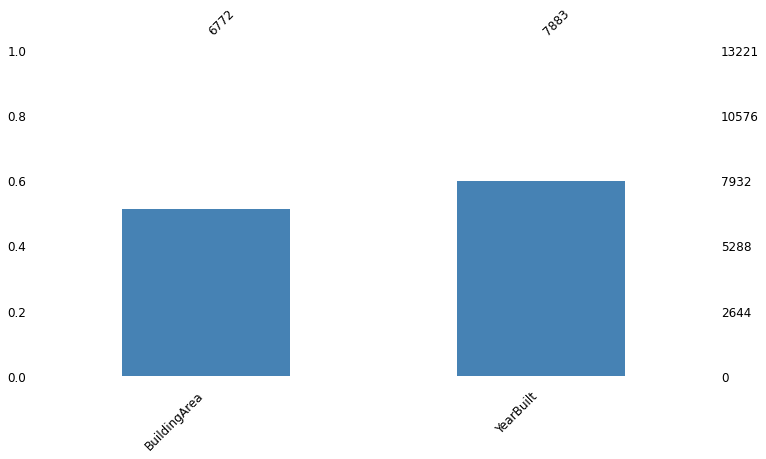

In [17]:
import missingno as msno

msno.bar(encoded_df[["BuildingArea", "YearBuilt"]],figsize=(12, 6), fontsize=12, color='steelblue')

### Ejercicio 2.2
KNeighborsRegressor requiere estandarizar los datos para evitar que Sckit Learn introduzca valores sesgados al momento de imputar

In [18]:
building_area_and_year_built_columns = ["BuildingArea", "YearBuilt"]
new_columns_names += building_area_and_year_built_columns

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_encoded_df = pandas.DataFrame(scaler.fit_transform(encoded_df), columns=new_columns_names)

standardized_encoded_df[:3]

,Suburb=Abbotsford,Suburb=Airport West,Suburb=Albert Park,Suburb=Alphington,Suburb=Altona,Suburb=Altona North,Suburb=Armadale,Suburb=Ascot Vale,Suburb=Ashburton,Suburb=Ashwood,...,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Rooms,BuildingArea,YearBuilt
0,15.332622,-0.070832,-0.072432,-0.050777,-0.075024,-0.06404,-0.084167,-0.098875,-0.064633,-0.057785,...,-0.934034,-0.771152,-0.620752,-0.086573,0.116760,0.040823,-0.784421,-0.970381,NaN,NaN
1,15.332622,-0.070832,-0.072432,-0.050777,-0.075024,-0.06404,-0.084167,-0.098875,-0.064633,-0.057785,...,-0.934034,-0.771152,-1.673390,-0.098000,0.011694,-0.007376,-0.784421,-0.970381,-0.906249,-1.786627
2,15.332622,-0.070832,-0.072432,-0.050777,-0.075024,-0.06404,-0.084167,-0.098875,-0.064633,-0.057785,...,0.126956,0.763837,-1.673390,-0.103465,-0.006028,0.002264,-0.784421,0.103929,0.340214,-1.786627


Creamos dos copias del DataFrame estandarizado: uno para cada método de imputación.

1. imputed_by_numerical_columns_df_scaled
2. imputed_by_building_area_and_year_built_df_scaled

Por limitación de memoria RAM del servidor, no podemos imputar por KNN utilizando toda la matriz expandida, por lo que limitamos el primer método de imputación a las columnas numéricas.

In [20]:
building_area_and_year_built_columns = ["BuildingArea", "YearBuilt"]
numerical_columns = numerical_cols + building_area_and_year_built_columns

imputed_by_numerical_columns_df_scaled =  standardized_encoded_df.copy()
imputed_by_building_area_and_year_built_df_scaled = standardized_encoded_df.copy()

Instanciamos el imputer

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

knn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

Imputamos por BuildingArea y YearBuilt

In [22]:
imputed_by_building_area_and_year_built_df_scaled[building_area_and_year_built_columns] = knn_imputer.fit_transform(
    imputed_by_building_area_and_year_built_df_scaled[building_area_and_year_built_columns])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Imputamos por todas las columnas

In [23]:
imputed_by_numerical_columns_df_scaled[numerical_columns] = knn_imputer.fit_transform(
    imputed_by_numerical_columns_df_scaled[numerical_columns])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Volvemos a las unidades originales de las variables

In [24]:
imputed_by_building_area_and_year_built_df = pandas.DataFrame(scaler.inverse_transform(imputed_by_building_area_and_year_built_df_scaled), columns=new_columns_names)
imputed_by_numerical_columns_df = pandas.DataFrame(scaler.inverse_transform(imputed_by_numerical_columns_df_scaled), columns=new_columns_names)

### Ejercicio 2.3
Realizamos la comparación gráfica

Comparamos la imputación de BuildingArea

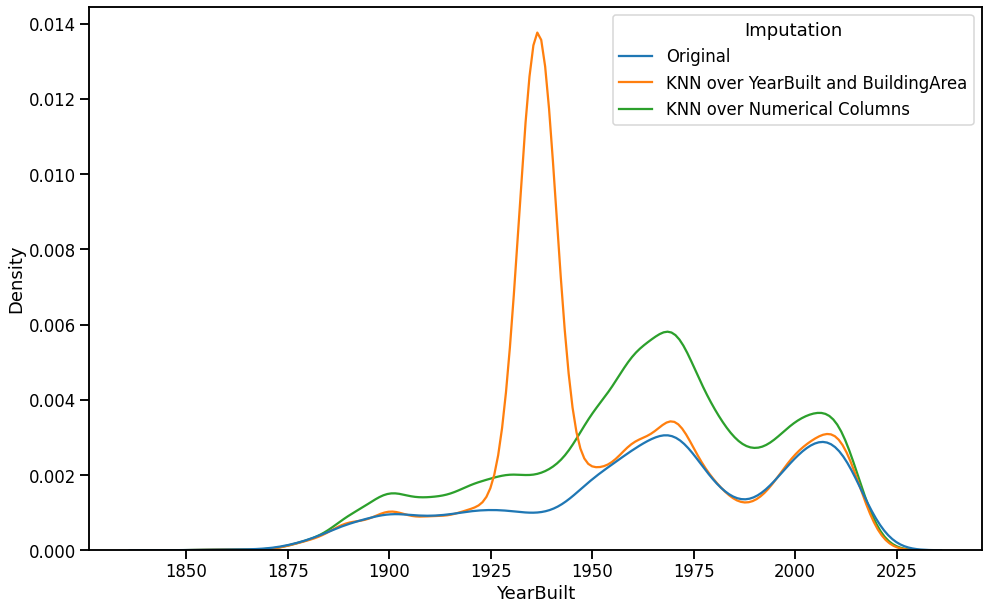

In [25]:
year_built_original = encoded_df.YearBuilt.dropna().to_frame()
year_built_original['Imputation'] = 'Original'

year_built_imputed_by_year_buiilt_and_building_area = imputed_by_building_area_and_year_built_df.YearBuilt.to_frame()
year_built_imputed_by_year_buiilt_and_building_area['Imputation'] = 'KNN over YearBuilt and BuildingArea'

year_built_imputed_by_numerical_columns = imputed_by_numerical_columns_df.YearBuilt.to_frame()
year_built_imputed_by_numerical_columns['Imputation']  = 'KNN over Numerical Columns'


data = pandas.concat([year_built_original, year_built_imputed_by_year_buiilt_and_building_area, year_built_imputed_by_numerical_columns], ignore_index=True)
fig = plt.figure(figsize=(16, 10))

g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

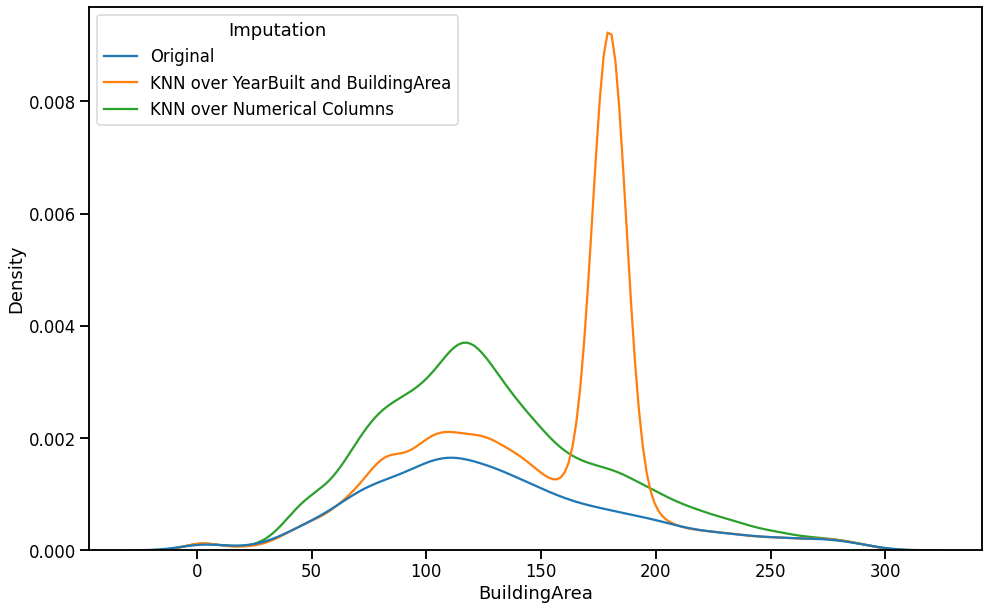

In [26]:
building_area_original = encoded_df.BuildingArea.dropna().to_frame()
building_area_original['Imputation'] = 'Original'

building_area_imputed_by_year_buiilt_and_building_area = imputed_by_building_area_and_year_built_df.BuildingArea.to_frame()
building_area_imputed_by_year_buiilt_and_building_area['Imputation'] = 'KNN over YearBuilt and BuildingArea'

building_area_imputed_by_numerical_columns = imputed_by_numerical_columns_df.BuildingArea.to_frame()
building_area_imputed_by_numerical_columns['Imputation']  = 'KNN over Numerical Columns'


data = pandas.concat([building_area_original, building_area_imputed_by_year_buiilt_and_building_area, building_area_imputed_by_numerical_columns], ignore_index=True)
fig = plt.figure(figsize=(16, 10))

g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

Podemos identificar gráficamente que el método de imputación por KNN sobre Columnas Numéricas es mejor que el método de imputación por KNN utilizando solo las columnas YearBuilt y BuildingArea, dado que respeta mejor la distribución original de los datos y no introduce sesgos al momento de imputar (pico de la curva naranja en ambos gráficos) 

In [27]:
encoded_df = imputed_by_numerical_columns_df

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [28]:
encoded_df[:3]

,Suburb=Abbotsford,Suburb=Airport West,Suburb=Albert Park,Suburb=Alphington,Suburb=Altona,Suburb=Altona North,Suburb=Armadale,Suburb=Ascot Vale,Suburb=Ashburton,Suburb=Ashwood,...,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Rooms,BuildingArea,YearBuilt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,2.0,104.2,1908.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,2.0,79.0,1900.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,3.0,150.0,1900.0


In [29]:
encoded_df.shape

(13221, 645)

Realizaremos el PCA solo con las variables numéricas del data frame, para ello procedemos a crear uno nuevo que contenga solo esas variables:

In [30]:
df_num=encoded_df[['Price',  'Distance',  'Postcode',  'Bedroom2',  'Bathroom',  'Car',  'Landsize',  'Lattitude',  'Longtitude',  'Propertycount','Rooms']].copy()
 

Si es necesario realizar una estandarización de los datos para que todas las variables estén en las mismas unidades y ninguna variable en particular tenga un peso demasiado grande. Por ello procedemos a estandarizar:

In [31]:
df_standard = (df_num-df_num.mean())/df_num.std()

Chequeamos si hay datos nulos:

In [32]:
df_standard.isnull().any()

Price            False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
Lattitude        False
Longtitude       False
Propertycount    False
Rooms            False
dtype: bool

Le decimos que coloque cero donde había NaN

In [33]:
df_standard.fillna(0,inplace=True)

Realizamos el PCA:

In [34]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=4)
pca2.fit(df_standard)
print("Principal components")
print(pca2.components_)
print("Explained variance: ")
print(pca2.explained_variance_)
print("Explained variance ratio")
print(pca2.explained_variance_ratio_)

Principal components
[[ 0.34128031  0.23409476  0.16883223  0.49419167  0.40453696  0.31050023
   0.03068932 -0.11121675  0.17874884 -0.05582342  0.49755272]
 [-0.05772291  0.29390305  0.56668568 -0.20470902 -0.12251814 -0.08926056
   0.00414704 -0.48546643  0.48951388  0.0733806  -0.20873205]
 [ 0.58682672 -0.65277862 -0.07889599 -0.07651441  0.13525492 -0.25537312
   0.01142607 -0.32218473  0.1530169   0.04775582 -0.06555744]
 [ 0.00262207 -0.04919187  0.04001576  0.02102307  0.03114134  0.08831896
   0.10374339  0.22191497  0.10080985  0.95715966  0.0208291 ]]
Explained variance: 
[3.16790886 1.87827241 1.23521869 1.01614468]
Explained variance ratio
[0.28799171 0.17075204 0.11229261 0.09237679]


Graficamos:

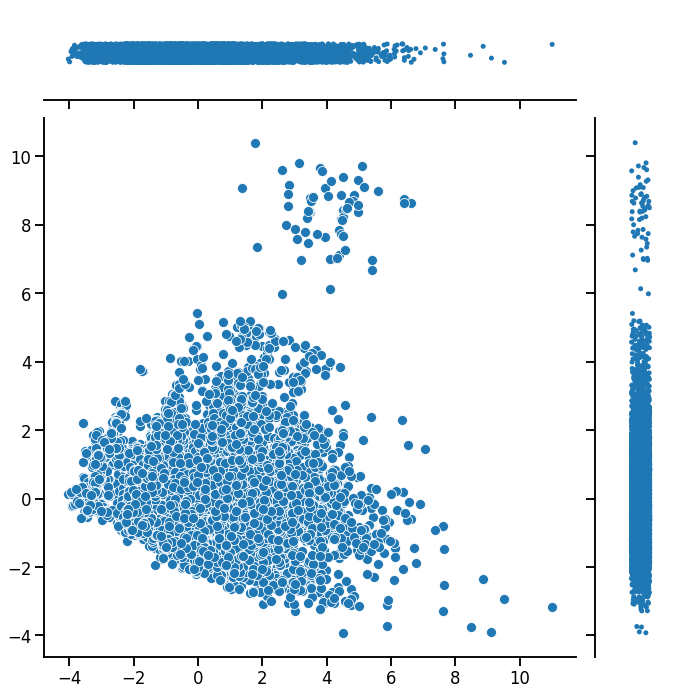

In [35]:
df_new_reduced = pca2.transform(df_standard)

g = seaborn.JointGrid(x=df_new_reduced[:,0], y=df_new_reduced[:,1],
                                         height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)


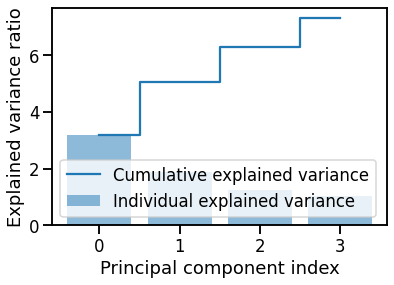

<Figure size 1152x720 with 0 Axes>

In [36]:
# Plot the explained variance against cumulative explained variance#
import matplotlib.pyplot as plt
cum_sum_exp = numpy.cumsum(pca2.explained_variance_)
plt.bar(range(0,len(pca2.explained_variance_)), pca2.explained_variance_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.figure(figsize=(16, 10))

plt.tight_layout()
plt.show()

In [37]:
principalDf = pandas.DataFrame(data = df_new_reduced
                               , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4' ])

Componentes principales:

In [38]:
principalDf[:3]

,principal component 1,principal component 2,principal component 3,principal component 4
0,-1.536917,-0.211997,1.428548,-0.799171
1,-2.117912,-0.047219,1.282226,-0.923493
2,-0.186498,-0.705365,1.772014,-0.832635


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

Unimos ambos data frames, agregando también los dos componentes principales del PCA:

In [39]:
df_principal_one_two=principalDf[['principal component 1','principal component 2']].copy()
 

In [40]:
processed_melb_df = pandas.concat([encoded_df, df_principal_one_two], axis=1)

In [41]:
processed_melb_df[:3]

,Suburb=Abbotsford,Suburb=Airport West,Suburb=Albert Park,Suburb=Alphington,Suburb=Altona,Suburb=Altona North,Suburb=Armadale,Suburb=Ascot Vale,Suburb=Ashburton,Suburb=Ashwood,...,Car,Landsize,Lattitude,Longtitude,Propertycount,Rooms,BuildingArea,YearBuilt,principal component 1,principal component 2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,202.0,-37.7996,144.9984,4019.0,2.0,104.2,1908.0,-1.536917,-0.211997
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,156.0,-37.8079,144.9934,4019.0,2.0,79.0,1900.0,-2.117912,-0.047219
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,134.0,-37.8093,144.9944,4019.0,3.0,150.0,1900.0,-0.186498,-0.705365


Procedemos a guardar el data frame procesado en un archivo:

In [42]:
processed_melb_df.to_csv("processed_melb_df.csv", index=None)
from google.colab import files  # Download
files.download("processed_melb_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
